In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib

In [2]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
df = pd.read_csv('submission_regression.csv')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


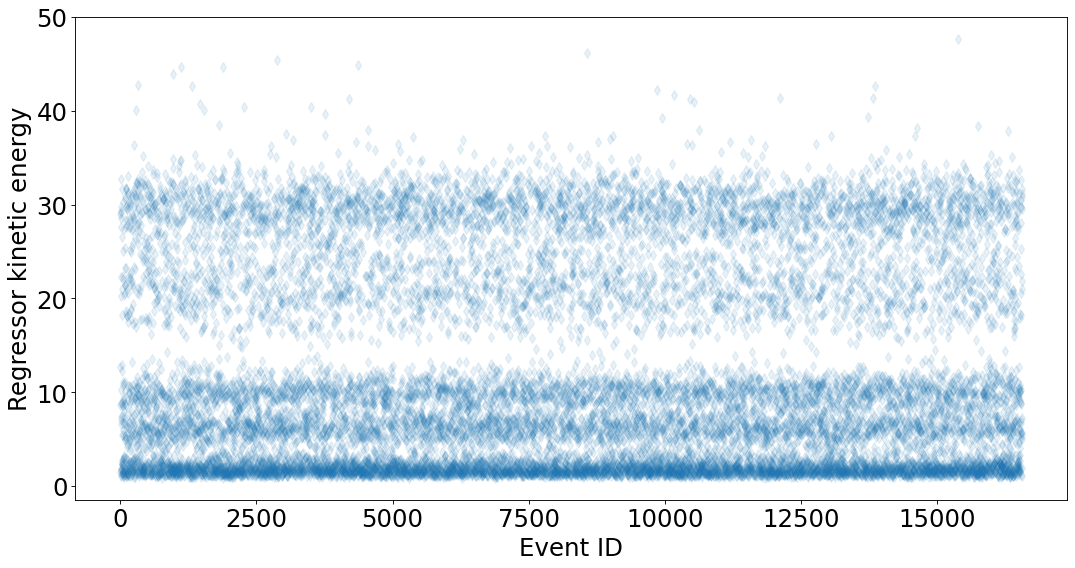

In [4]:
figure(figsize=(16,8), dpi=80)

plt.plot(np.array(range(len(df['energy']))),(df['energy'].values), 'd', alpha=0.1)
plt.xlabel('Event ID')
plt.ylabel('Regressor kinetic energy')
# plt.xscale('log')
plt.show()

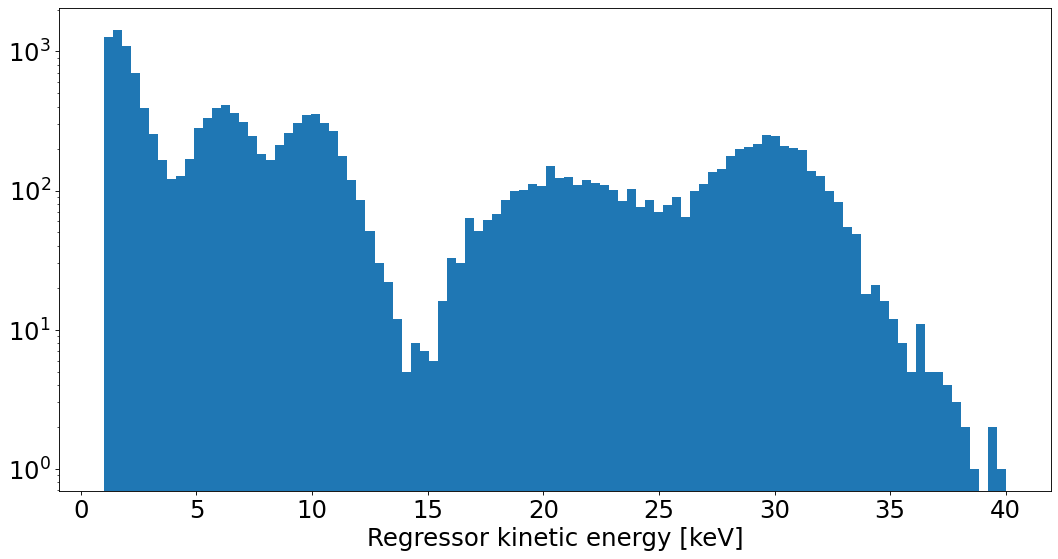

In [5]:
figure(figsize=(16,8), dpi=80)
plt.hist(df['energy'].values, bins =100, range = (1, 40))
plt.xlabel('Regressor kinetic energy [keV]')
plt.yscale('log')
plt.show()

In [6]:
def discrete_energy(energy_col):
    energy = np.array([1, 3, 6, 10, 20, 30]).astype(float)
    discrete_energy = energy[np.argmin(np.abs(energy_col - energy))]
    return discrete_energy

In [7]:
df['discrete_energy'] = df.energy.apply(discrete_energy)

In [8]:
df.head()

,id,energy,discrete_energy
0,5e1512499f743663ce899d5cd22beedcc8c002f4,28.983856,30.0
1,4283a219202cb4bee5c97ba9960e7fc656a4e976,12.655455,10.0
2,727751c123799e86aaaa2bdf2dc4e8b1ddc1cc4b,8.614704,10.0
3,64eddfb872da6258e528a6d67fd5b96f57c6213c,1.481510,1.0
4,824de090c3b3de561fe6c48d839455c4f29f8aa3,1.871874,1.0


<Figure size 1280x640 with 0 Axes>

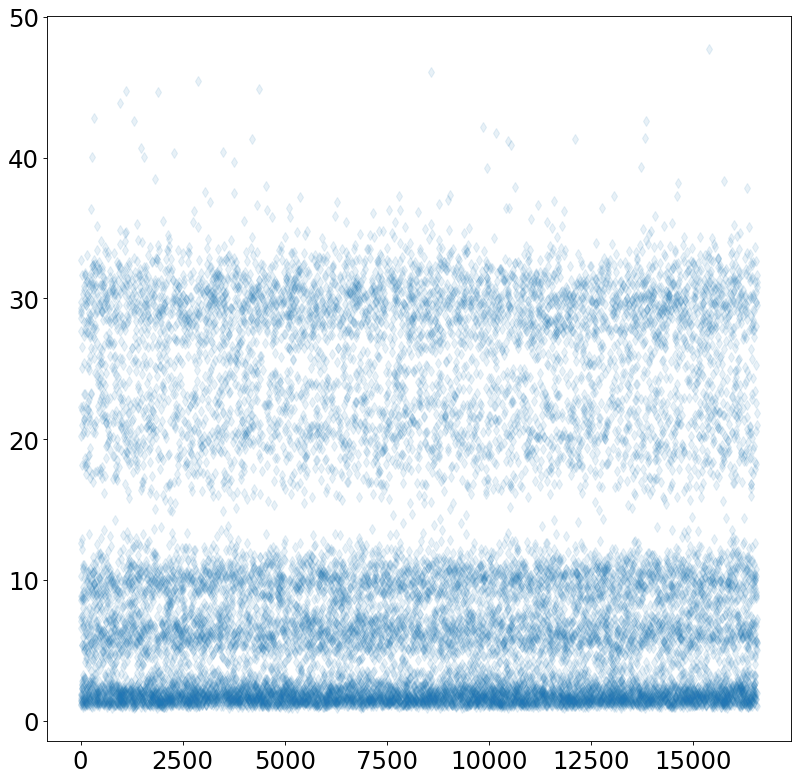

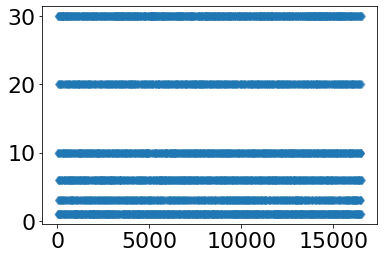

In [9]:
figure(figsize=(16,8), dpi=80)

figure(figsize=(12, 12), dpi=80)
plt.plot(np.array(range(len(df['energy']))),df['energy'].values, 'd', alpha=0.1)
plt.show()
plt.plot(np.array(range(len(df['discrete_energy']))),df['discrete_energy'].values, 'd', alpha=0.1)


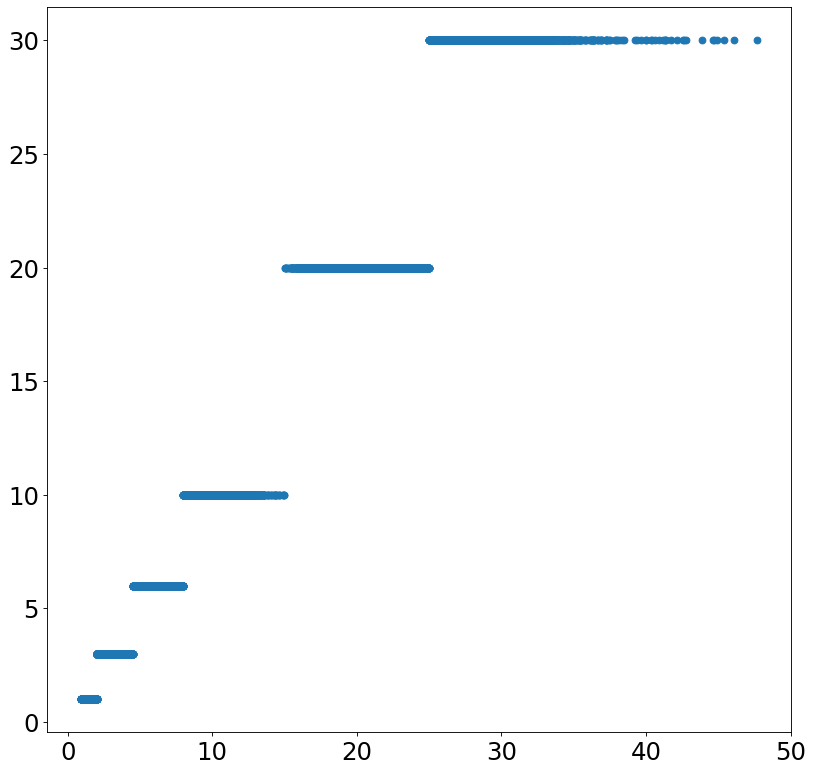

In [10]:
figure(figsize=(12, 12), dpi=80)
plt.scatter(df['energy'],df['discrete_energy'])

In [11]:
df = df.drop(columns=['energy'])

In [12]:
df =df.rename(columns={"discrete_energy": "energy"})

In [13]:
df.to_csv('submission_regression_discrete_energy.csv',index = False)